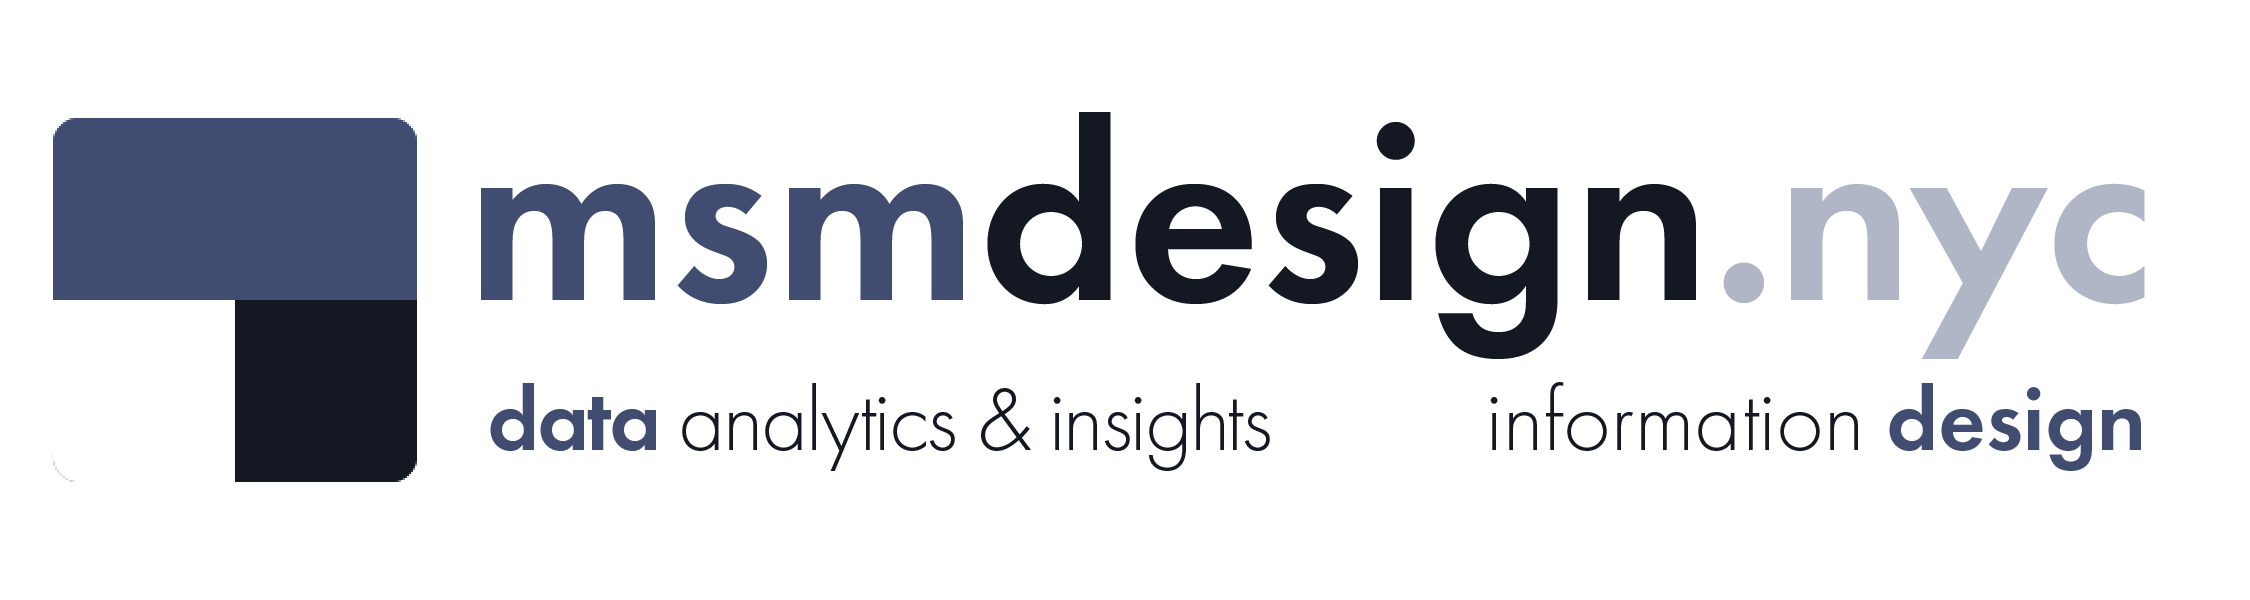

---
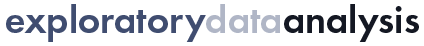

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.


**Dataset Analyzed:** *Mayor’s Office of Operations: Demographic Survey*

**About This Dataset:** Pursuant to Local Laws 126, 127, and 128 of 2016, certain demographic data is collected voluntarily and anonymously by persons voluntarily seeking social services. This data can be used by agencies and the public to better understand the demographic makeup of client populations and to better understand and serve residents of all backgrounds and identities. Data provided by the Mayor’s Office of Operations (OPS), the City of New York: https://data.cityofnewyork.us/City-Government/Mayor-s-Office-of-Operations-Demographic-Survey/tap2-dwrw



**Acknowledgements:** NYC open Data https://opendata.cityofnewyork.us


**EDA Catalogue Number:** MSM-030


**EDA Publication Date:** Tuesday, November 2, 2021


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

## **0. Setup the workspace**

In [1]:
# import the libraries we'll need for data anlysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the library needed to load json data from the Socrata api

from sodapy import Socrata

In [3]:
# load the json data and store it in a variable

client = Socrata("data.cityofnewyork.us", None)

# First 2000 results, returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("tap2-dwrw", limit=800000)

# Convert to pandas DataFrame
surveys = pd.DataFrame.from_records(results)

In [4]:
surveys.shape

(716533, 11)

In [5]:
# display the first few lines and the last few lines of the DataFrame to confirm that the data has loaded successfully

surveys.head()

,id,survey_number,survey_instance_id,survey_status,survey_language,dt_submitted,question,answer,answer_is_optional,data_source,create_dt
0,86483,55,90002903,Complete,English,2019-01-23T00:00:00.000,How would you describe your gender?,Female,False,Paper,2019-01-23T00:00:00.000
1,128139,50003666,3472,Complete,English,2019-02-22T00:00:00.000,Are you intersex?,No,False,OnLine,2019-03-08T00:00:00.000
2,25111,29,90000338,Complete,English,NaN,Do you want to answer the questions?,Yes,False,Paper,2018-12-18T00:00:00.000
3,93101,50003666,2401,Complete,English,2019-01-21T00:00:00.000,What sex were you given at birth?,Female,False,OnLine,2019-02-07T00:00:00.000
4,85443,52,90002821,Complete,Spanish,2018-12-18T00:00:00.000,Do you want to answer the questions?,Yes,False,Paper,2019-01-23T00:00:00.000


In [6]:
surveys.tail(3)

,id,survey_number,survey_instance_id,survey_status,survey_language,dt_submitted,question,answer,answer_is_optional,data_source,create_dt
716530,1044843,50003666,127139,Complete,English,2021-08-29T00:00:00.000,Are you intersex?,No,False,OnLine,2021-09-09T00:00:00.000
716531,1030105,50003666,124247,Complete,English,2021-08-13T00:00:00.000,What other languages do you speak?,Spanish,False,OnLine,2021-09-09T00:00:00.000
716532,1028810,50003666,123963,Complete,English,2021-08-12T00:00:00.000,What other languages do you speak?,English,False,OnLine,2021-09-09T00:00:00.000


## **1. Wrap our heads around what is contained in the dataset**

In [7]:
# how many rows and columns are in our dataset?

surveys.shape

(716533, 11)

In [8]:
# what is the index (set of row labels) for our dataset?

surveys.index

RangeIndex(start=0, stop=716533, step=1)

In [9]:
# what are the columns of our dataset?

surveys.columns

Index(['id', 'survey_number', 'survey_instance_id', 'survey_status',
       'survey_language', 'dt_submitted', 'question', 'answer',
       'answer_is_optional', 'data_source', 'create_dt'],
      dtype='object')

In [10]:
# what type of data is being stored in each column of our DataFrame?
# which columns (if any) are missing data?

surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716533 entries, 0 to 716532
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  716533 non-null  object
 1   survey_number       716533 non-null  object
 2   survey_instance_id  716533 non-null  object
 3   survey_status       716533 non-null  object
 4   survey_language     716464 non-null  object
 5   dt_submitted        697241 non-null  object
 6   question            716533 non-null  object
 7   answer              716531 non-null  object
 8   answer_is_optional  716533 non-null  bool  
 9   data_source         716533 non-null  object
 10  create_dt           716533 non-null  object
dtypes: bool(1), object(10)
memory usage: 55.4+ MB


In [11]:
# let's adjust the data types of our columns so we can better analyze the data

surveys['survey_status'] = surveys['survey_status'].astype('category')

surveys['survey_language'] = surveys['survey_language'].astype('category')

surveys['dt_submitted'] = pd.to_datetime(surveys['dt_submitted'], errors='coerce')

surveys['data_source'] = surveys['data_source'].astype('category')

surveys['create_dt'] = pd.to_datetime(surveys['create_dt'], errors='coerce')

In [12]:
# confirm that the changes to our data types have been performed correctly

surveys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716533 entries, 0 to 716532
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  716533 non-null  object        
 1   survey_number       716533 non-null  object        
 2   survey_instance_id  716533 non-null  object        
 3   survey_status       716533 non-null  category      
 4   survey_language     716464 non-null  category      
 5   dt_submitted        695904 non-null  datetime64[ns]
 6   question            716533 non-null  object        
 7   answer              716531 non-null  object        
 8   answer_is_optional  716533 non-null  bool          
 9   data_source         716533 non-null  category      
 10  create_dt           716533 non-null  datetime64[ns]
dtypes: bool(1), category(3), datetime64[ns](2), object(5)
memory usage: 41.0+ MB


In [13]:
# display summary statistics for the categorical variables contained in our dataset

surveys.describe(include=['category'])

,survey_status,survey_language,data_source
count,716533,716464,716533
unique,2,12,2
top,Complete,English,OnLine
freq,712847,631109,574052


In [14]:
# when was the first survey in our dataset completed?

surveys['create_dt'].min()

Timestamp('2018-11-15 00:00:00')

In [15]:
# when was the most recent survey in our dataset completed?

surveys['create_dt'].max()

Timestamp('2021-09-14 00:00:00')

**First impressions of our dataset:**
- The dataset is 11 columns wide and 716,533 rows long.
- Each row is survey.
- There is no missing data in 10 of the 11 columns. The about 'dt_submitted' column has 20,000 rows that contain null values (partially completed surveys).
- The surveys were completed between November 15, 2018 and September 14, 2021.

## **2. Identify and subset the data that's relevant to our research**

In [16]:
# filter out partially completed surveys

completed_surveys = surveys.loc[(surveys['survey_status'] == 'Complete')]

In [17]:
# select the columns we want to explore further and store them in a variable

survey_data = completed_surveys.loc[:,['id', 'survey_language', 'question', 
                                       'answer','answer_is_optional', 'data_source', 
                                       'create_dt']]

In [18]:
# display the first few lines of the new dataframe to confirm that the data has loaded correctly

survey_data.head()

,id,survey_language,question,answer,answer_is_optional,data_source,create_dt
0,86483,English,How would you describe your gender?,Female,False,Paper,2019-01-23
1,128139,English,Are you intersex?,No,False,OnLine,2019-03-08
2,25111,English,Do you want to answer the questions?,Yes,False,Paper,2018-12-18
3,93101,English,What sex were you given at birth?,Female,False,OnLine,2019-02-07
4,85443,Spanish,Do you want to answer the questions?,Yes,False,Paper,2019-01-23


**Let's take a closer look at the following variables:**
- id
- survey_language
- question
- answer
- answer_is_optional
- data_source
- create_dt

## **3. Summarize and describe the contents of the dataset**

In [19]:
# how many different questions were asked in the survey?

survey_data['question'].nunique()

15

In [20]:
# what were the questions asked?

survey_data['question'].unique()

array(['How would you describe your gender?', 'Are you intersex?',
       'Do you want to answer the questions?',
       'What sex were you given at birth?',
       'What other languages do you speak?',
       'What NYC agency did you apply for services with today?',
       'How well do you speak English?',
       'Has anyone in your household served Write in:',
       'What ancestries or heritages do you identify with?',
       'What races or ethnicities do you identify with?',
       'What service did you apply for?',
       'What is your sexual orientation?',
       'What is the language you speak most at home?',
       '10a. If you are intersex, please select from below.',
       'I am intersex because'], dtype=object)

In [21]:
# let's focus in on some of those questions


# select the responses to question 1: 'What is your sexual orientation?'

orientation = survey_data.loc[survey_data['question']=='What is your sexual orientation?']

<AxesSubplot:title={'center':'What is your sexual orientation?'}>

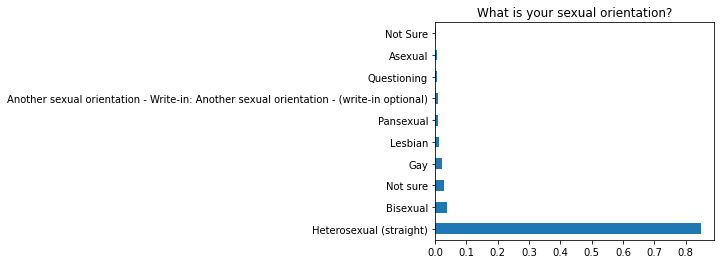

In [54]:
# plot showing each response as a the percentage of the total

orientation['answer'].value_counts(normalize=True).nlargest(10).plot(kind='barh', figsize=(5,4),title='What is your sexual orientation?')

In [57]:
# select the responses to question 2: 'Do you want to answer the questions?'

want_to_answer = survey_data.loc[survey_data['question']=='Do you want to answer the questions?']

<AxesSubplot:title={'center':'Do you want to answer the questions?'}>

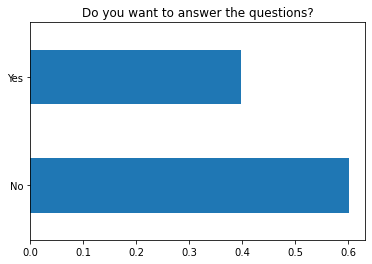

In [55]:
want_to_answer['answer'].value_counts(normalize=True).plot(kind='barh',title='Do you want to answer the questions?')

In [56]:
# select the responses to question 4: 'What service did you apply for?'

service = survey_data.loc[survey_data['question']=='What service did you apply for?']

<AxesSubplot:title={'center':'What service did you apply for?'}>

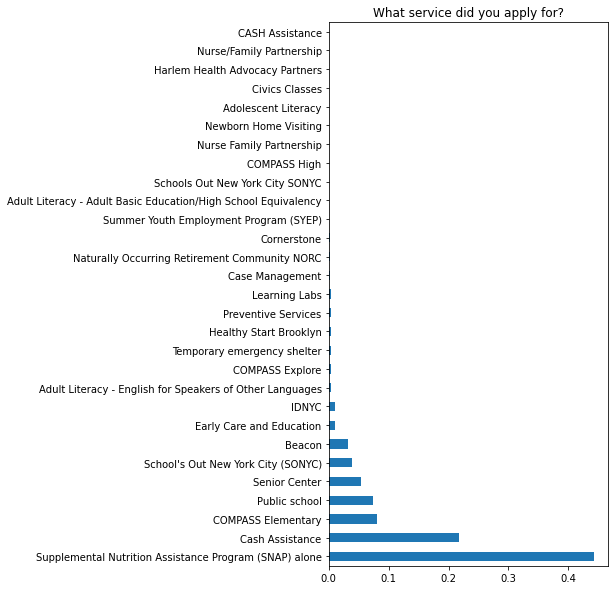

In [35]:
# plot showing each response as a the percentage of the total

service['answer'].value_counts(normalize=True).plot(kind='barh',figsize=(5,10),title='What service did you apply for?')

In [28]:
# select the responses to question 5: 'What NYC agency did you apply for services with today?'

agencies = survey_data.loc[survey_data['question']=='What NYC agency did you apply for services with today?']

<AxesSubplot:title={'center':'What NYC agency did you apply for services with today?'}>

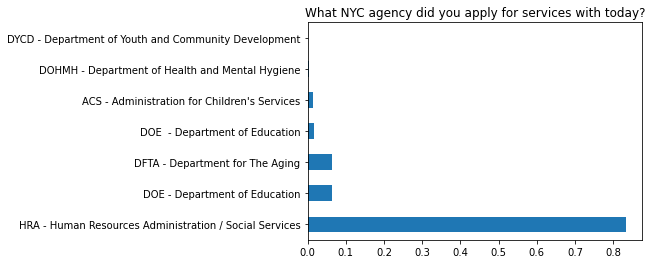

In [36]:
# plot showing each response asa percentage of the total

agencies['answer'].value_counts(normalize=True).plot(kind='barh',title='What NYC agency did you apply for services with today?')

In [30]:
# select the responses to question 6: 'How well do you speak English?'

english_proficiency = survey_data.loc[survey_data['question']=='How well do you speak English?']

<AxesSubplot:title={'center':'How well do you speak English?'}>

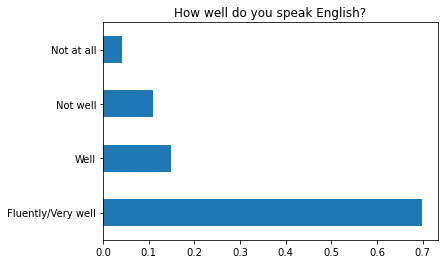

In [37]:
# plot showing each response as a percentage of the total

english_proficiency['answer'].value_counts(normalize=True).plot(kind='barh',title='How well do you speak English?')

In [32]:
# select the responses to question 7: 'What sex were you given at birth?'

sex = survey_data.loc[survey_data['question']=='What sex were you given at birth?']

<AxesSubplot:title={'center':'What sex were you given at birth?'}>

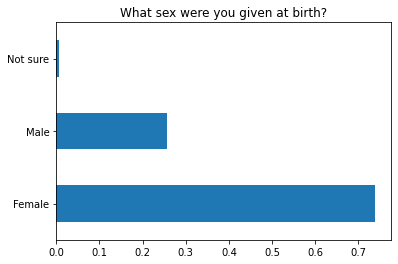

In [38]:
# plot showing each response as a percentage of the total

sex['answer'].value_counts(normalize=True).plot(kind='barh',title='What sex were you given at birth?')

In [39]:
# select the responses to question 8: 'What is the language you speak most at home?'

home_language = survey_data.loc[survey_data['question']=='What is the language you speak most at home?']

<AxesSubplot:title={'center':'What is the language you speak most at home?'}>

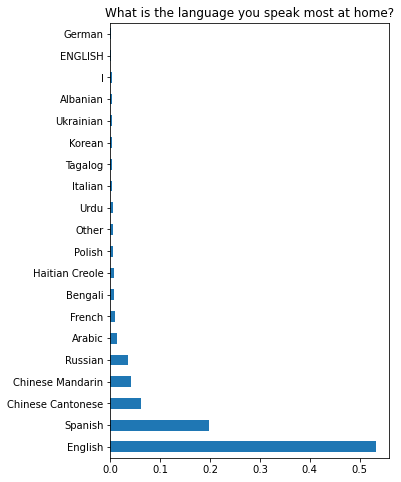

In [63]:
# plot showing each response as percentage of the total

home_language['answer'].value_counts(normalize=True).nlargest(20).plot(kind='barh',figsize=(5,8),title='What is the language you speak most at home?')

## **4. Final takeaways** 

- This data was collected voluntarily and anonymously by persons voluntarily seeking social services in NYC between November 2018 and September 2021

- More than 700,000 people responded to the survey

- Almost half of the respondents were applying for SNAP benefits (food stamps)

- More than 70% of the respondents were female

- More than 50% of the respondents speak English at home, 20% speak Spanish at home and 10% speak either Cantonese or Mandarin at home

***